
# **Predicting House Prices with Linear Regression**

This notebook explores housing price prediction using a cleaned dataset and applies machine learning models to predict house prices based on various features.

- **Key Concepts and Challenges:** 
    - Data Collection: Obtain a dataset with numerical features and a target variable for
      prediction.
    - Data Exploration and Cleaning: Explore the dataset to understand its structure, handle
      missing values, and ensure data quality
    - Feature Selection: Identify relevant features that may contribute to the predictive model.
    - Model Training: Implement linear regression using a machine learning library (e.g., ScikitLearn).
    - Model Evaluation: Evaluate the model's performance on a separate test dataset using metrics such         as Mean Squared Error or R-squared.
    - Visualization: Create visualizations to illustrate the relationship between the predicted and
      actual values.
      




# **Data Loading and Exploration**

In this section, we load the dataset(s) and perform initial exploration to understand its structure and characteristics. Key tasks include:
- Loading data
- Inspecting columns and data types to ensure compatibility for analysis.
- Identifying potential issues such as missing values or outliers.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
#load dataset
file_path='C:/Users/ADMIN/Desktop/WORK/Jobs/Oasis_Internship/Housing.csv'
df=pd.read_csv(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [5]:
# Cleaning data
## Check for missing values
print('Missing Values: ')
print(df.isnull().sum())
# Duplicates
print('\nDuplicates:')
print(f'Number of duplicate rows: {df.duplicated().sum()}')

# Data types
print("\nData Types:")
print(df.dtypes)

Missing Values: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Duplicates:
Number of duplicate rows: 0

Data Types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


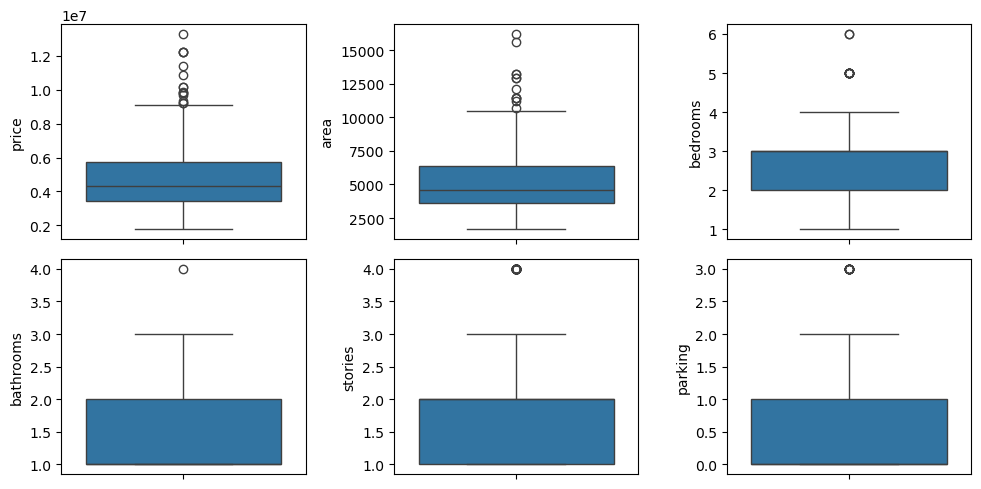

In [6]:
# Creating subplots for boxplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plotting boxplots in each subplot
sns.boxplot(df['price'], ax=axs[0, 0])
sns.boxplot(df['area'], ax=axs[0, 1])
sns.boxplot(df['bedrooms'], ax=axs[0, 2])
sns.boxplot(df['bathrooms'], ax=axs[1, 0])
sns.boxplot(df['stories'], ax=axs[1, 1])
sns.boxplot(df['parking'], ax=axs[1, 2])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Outlier Removal
We will remove outliers in the `price` and `area` columns using the Interquartile Range (IQR) method.


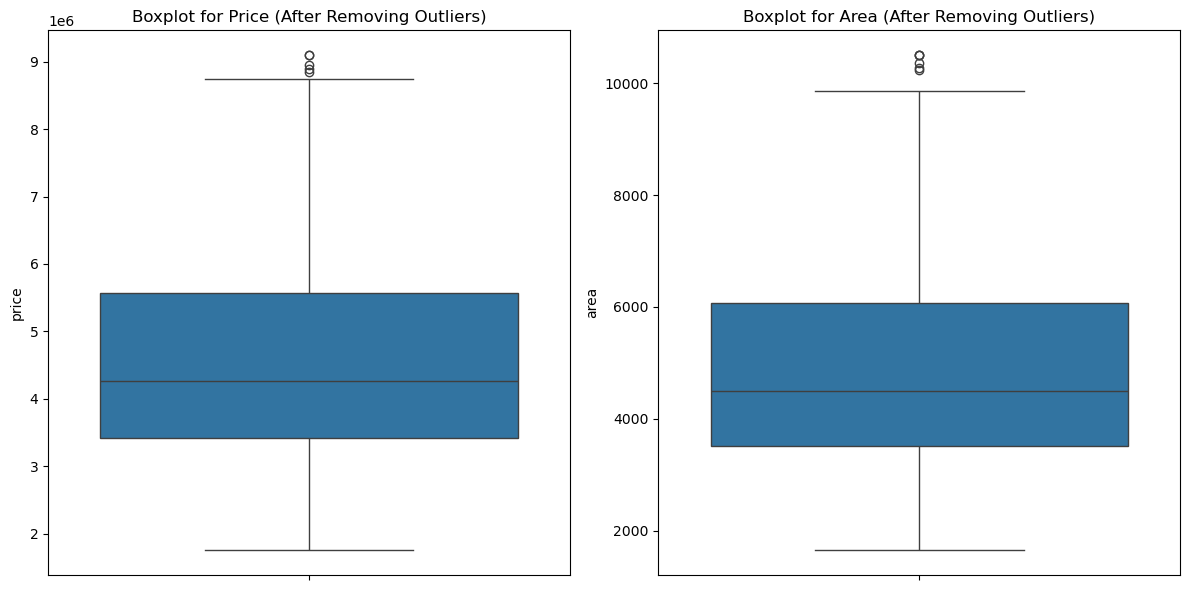

In [7]:
# For 'price' column
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# For 'area' column
Q1_area = df['area'].quantile(0.25)
Q3_area = df['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

# Apply the filtering to remove outliers for both 'price' and 'area'
df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)]
df = df[(df['area'] >= lower_bound_area) & (df['area'] <= upper_bound_area)]

# Plotting boxplots for 'price' and 'area' after removing outliers
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot boxplots for 'price' and 'area' columns
sns.boxplot(df['price'], ax=axs[0])
axs[0].set_title('Boxplot for Price (After Removing Outliers)')
sns.boxplot(df['area'], ax=axs[1])
axs[1].set_title('Boxplot for Area (After Removing Outliers)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [8]:
print('Missing Values: ')
print(df.isnull().sum())

Missing Values: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


## Encoding Categorical Variables
We will convert categorical variables into numerical values for easier processing by machine learning models.


In [9]:
#encoding categorical columns into numerical values
non_numerical_cols = df.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numerical_cols)

# Columns with yes/no values
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Map yes/no to 1/0
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
# Map categories to integers
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})


Non-numerical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


## Feature Selection
We will analyze the correlation matrix to select features most strongly associated with the target variable `price`.


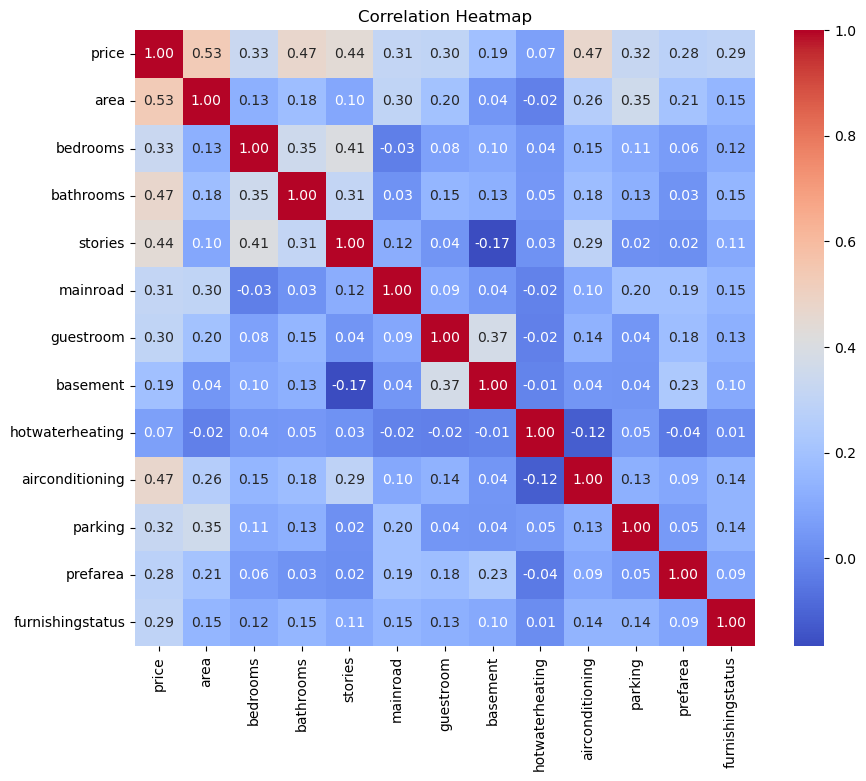

Correlation of features with 'price':

price               1.000000
area                0.532442
airconditioning     0.471205
bathrooms           0.468149
stories             0.441913
bedrooms            0.333710
parking             0.322168
mainroad            0.308367
guestroom           0.300780
furnishingstatus    0.294230
prefarea            0.282393
basement            0.190709
hotwaterheating     0.074745
Name: price, dtype: float64

Selected Features (Correlation > 0.1):

['price', 'area', 'airconditioning', 'bathrooms', 'stories', 'bedrooms', 'parking', 'mainroad', 'guestroom', 'furnishingstatus', 'prefarea', 'basement']


In [10]:

# Correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Find correlation of each feature with the target variable (price)
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation of features with 'price':\n")
print(correlation_with_price)

# Threshold for dropping features
correlation_threshold = 0.1
selected_features = correlation_with_price[correlation_with_price.abs() > correlation_threshold]
print("\nSelected Features (Correlation > 0.1):\n")
print(selected_features.index.tolist())

## Model Training and Evaluation
In this notebook, we train two machine learning models to predict house prices:

1. **Random Forest Regressor**: A robust ensemble model that builds multiple decision trees and averages their outputs to improve accuracy and control overfitting.
2. **Linear Regression**: A straightforward regression model that assumes a linear relationship between the features and the target variable.

We will evaluate the performance of these models using metrics like **Mean Squared Error (MSE)** and **R-squared (R²)**.



In [11]:
# Create new DataFrame with selected features
selected_features = correlation_with_price[correlation_with_price.abs() > correlation_threshold].index.tolist()
selected_features.remove('price')
df_selected = df[selected_features]
from sklearn.model_selection import train_test_split
# Splitting data into features (X) and target (y)
X = df_selected
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### Random Forest Regressor
The Random Forest Regressor is trained using the selected features. We analyze the feature importances provided by the model to understand which features most influence the predictions.


In [12]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Fit a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Display the feature importance
print(feature_importances)

                  importance
area                0.484923
bathrooms           0.100673
airconditioning     0.079957
stories             0.075486
furnishingstatus    0.068550
parking             0.045738
bedrooms            0.042227
prefarea            0.039521
basement            0.030152
guestroom           0.023134
mainroad            0.009640


### Variance Inflation Factor (VIF)
To ensure that the features used in the model are not highly correlated, we calculate the Variance Inflation Factor (VIF) for each feature. 

- **VIF** quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.
- Features with **VIF > 10** are considered highly collinear and may be removed from the dataset.

This step helps improve model stability and interpretability.


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_const = add_constant(X_train)  # Add constant column for VIF calculation
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Print VIF for each feature
print(vif_data)

             feature        VIF
0              const  29.097447
1               area   1.400429
2    airconditioning   1.172266
3          bathrooms   1.231226
4            stories   1.486468
5           bedrooms   1.388527
6            parking   1.197936
7           mainroad   1.226852
8          guestroom   1.213655
9   furnishingstatus   1.094047
10          prefarea   1.146573
11          basement   1.339378


### Linear Regression
The Linear Regression model is trained and evaluated using the selected features. This simple model helps establish a baseline and provides interpretable coefficients for each feature.


In [ ]:
# Train it on the training set
model = LinearRegression()
model.fit(X_train, y_train)  # Fit the model to the training data

# Predict the house prices for the test set
y_pred = model.predict(X_test)


## Model Evaluation

In this section, we assess the performance of the trained regression model using key metrics:

1. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between the actual and predicted values.
   - Lower MSE indicates better model performance.

2. **R-squared (R²)**:
   - Represents the proportion of variance in the target variable explained by the features.
   - R² values range from 0 to 1, with higher values indicating a better fit.

The evaluation metrics provide insights into the model's accuracy and its ability to generalize to unseen data.


In [ ]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared (R²)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # Measure of model error
r2 = r2_score(y_test, y_pred)  # Proportion of variance explained by the model
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Evaluate the model using cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 5-fold cross-validation
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {np.mean(cv_scores)}")

Mean Squared Error: 1053385504889.7239
R-squared: 0.6619338452407522
Cross-Validation R² Scores: [ -3.84797691  -4.96521564 -12.66643162 -17.81305927  -7.22395249]
Mean Cross-Validation R²: -9.30332718667994


## Visualization
We will plot the relationship between actual and predicted prices, along with residuals.


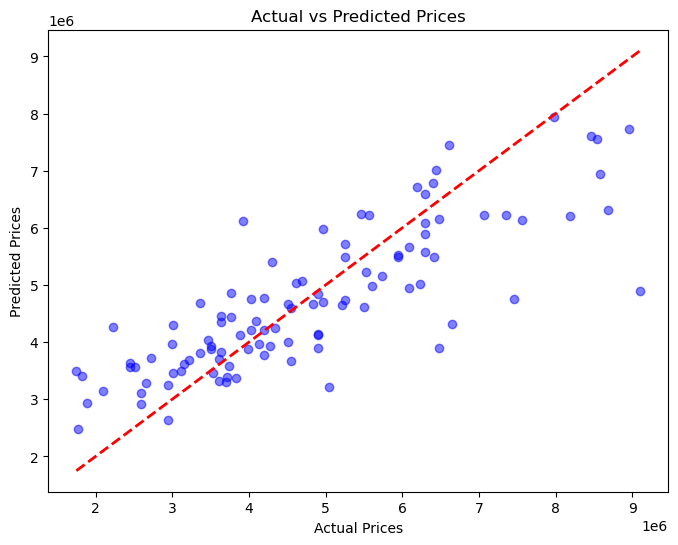

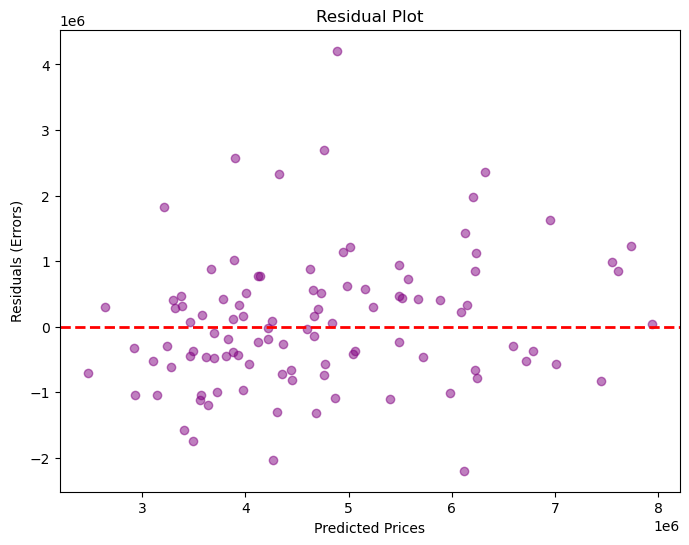

In [16]:

# Visualize the relationship between actual and predicted prices
plt.figure(figsize=(8, 6))
# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
# Line to represent perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# Add title and axis labels for better visualization
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Residual Plot: Errors vs Predicted Prices
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Errors)')
plt.show()

# Display the plot
plt.show()

## Model Visualizations Insights

### **Actual vs. Predicted Prices**
- **Observations:**
  - Positive correlation between actual and predicted prices.
  - Points scattered around the diagonal line suggest some prediction inaccuracies.
  - Wider spread of points at higher price ranges.

- **Insight:** The model captures the trend but struggles with accuracy, especially for higher-priced houses.

---

### **Residual Plot**
- **Observations:**
  - Residuals should ideally be randomly scattered around zero.
  - A slight pattern in the residuals, with an upward trend at higher price ranges, is observed.

- **Insight:** The model underpredicts prices for higher-priced houses and may not fully capture key relationships.

---

### **Overall Interpretation**
- The model provides a reasonable fit but shows limitations in accuracy, particularly for higher-priced houses.
- Non-linear relationships or missing influential factors might affect performance.
